# 美國健保資料分析與模型建立

### 資料庫來源：
https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset


主要分析與預測項目： 
1. 吸菸者在年齡、性別、BMI、小孩數、地區、健保支出上的比例
2. 小孩數的差異是否會導致健保支出的不同
3. 健保支出模型建立

In [318]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

In [319]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [320]:
df.isna().value_counts()

age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 吸菸者在年齡、性別、BMI、小孩數、地區、健保支出上的比例分佈

Text(0.5, 1.0, 'smoker vs. non-smoker in HS expense')

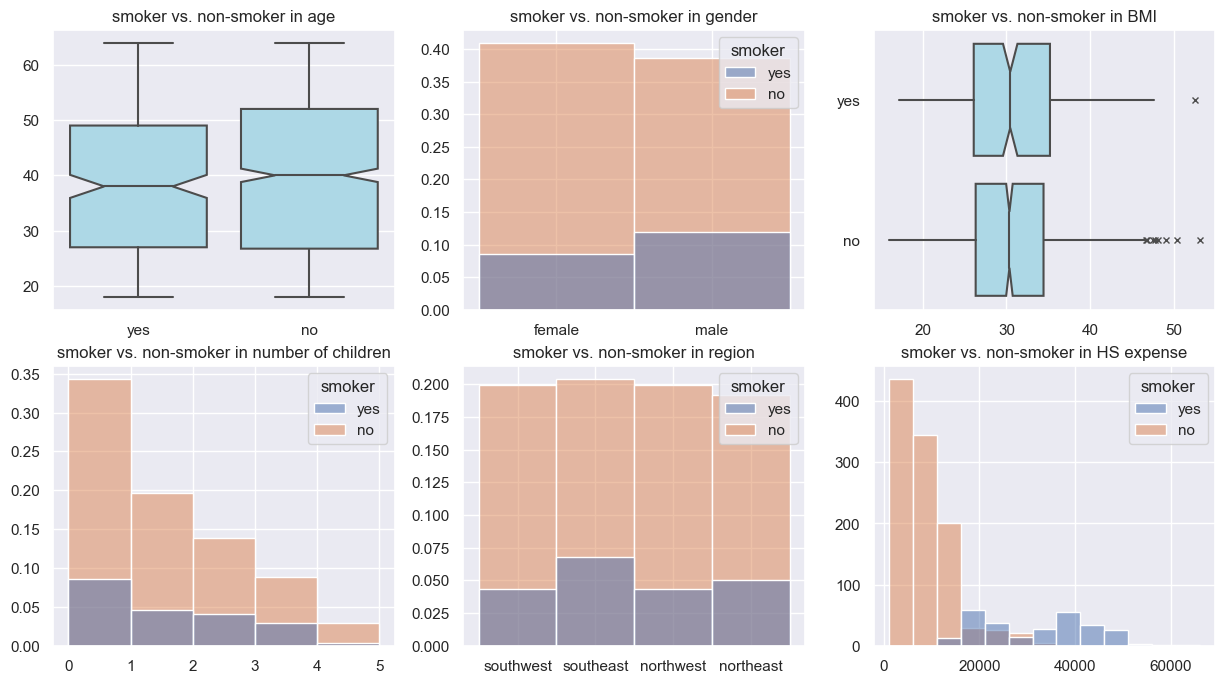

In [322]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8), sharex = False)
sns.set_theme()

# somker vs age
sns.boxplot(ax = axes[0, 0], data = df, x = 'smoker', y = df['age'], notch = True, boxprops = {'facecolor':'lightblue'})
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title('smoker vs. non-smoker in age')

# somker vs gender
sns.histplot(ax = axes[0, 1], data = df, x = 'sex', hue = 'smoker', stat = 'density')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title('smoker vs. non-smoker in gender')

# somker vs BMI
sns.boxplot(ax = axes[0, 2], data = df, x = 'bmi', y = 'smoker', notch = True, boxprops = {'facecolor':'lightblue'}, flierprops = {'marker':'x'}, showcaps = False)
axes[0,2].set_xlabel(None)
axes[0,2].set_ylabel(None)
axes[0,2].set_title('smoker vs. non-smoker in BMI')

# somker vs number of children
sns.histplot(ax = axes[1,0], data = df, x = 'children', hue = 'smoker', stat = 'density', binwidth = 1)
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title('smoker vs. non-smoker in number of children')

# somker vs region
sns.histplot(ax = axes[1,1], data = df, x = 'region', hue = 'smoker', stat = 'density')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title('smoker vs. non-smoker in region')

# somker vs HS expense
sns.histplot(ax = axes[1, 2], data = df, x = 'charges', hue = 'smoker', binwidth = 5000, stat = 'count')
axes[1,2].set_xlabel(None)
axes[1,2].set_ylabel(None)
axes[1,2].set_title('smoker vs. non-smoker in HS expense')
# axes[1,2].set_xticklabels(['5k', '10k', '15k'])

In [323]:
age_x = df[df['smoker'] == 'yes']['age']
age_o = df[df['smoker'] == 'no']['age']

print('somker vs age P-value:', stats.ttest_ind(a = age_o, b = age_x, equal_var=True)[1])

bmi_x = df[df['smoker'] == 'yes']['bmi']
bmi_o = df[df['smoker'] == 'no']['bmi']

print('somker vs BMI P-value:', stats.ttest_ind(a = bmi_o, b = bmi_x, equal_var=True)[1])

charge_x = df[df['smoker'] == 'yes']['charges']
charge_o = df[df['smoker'] == 'no']['charges']

print('somker vs HS expense P-value:', stats.ttest_ind(a = charge_o, b = charge_x, equal_var=True)[1])


somker vs age P-value: 0.36048529037840416
somker vs BMI P-value: 0.8909850280013041
somker vs HS expense P-value: 8.271435842179102e-283


從上述兩圖表可以得出以下推論：不管是年齡、性別、BMI與地區對於吸煙的與否可以非常篤定推論是不太有相關性的（P值過高，無法排除虛無假說）。 \
小孩的多寡對於吸煙者的數學從圖表可以看出：隨著小孩數量的增加，吸煙者的數量的確是有下降，代表兩者存在相關性的可能性可能是無法忽視的。 \
而唯一可以最大可能使對立假說成立的僅有健保的支出與吸菸的與否，兩者的P值低於基本顯著水準5%。

### 小孩數的差異是否會導致健保支出的不同

In [324]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [325]:
chi_0 = df[df['children']== 0]['charges']
chi_1 = df[df['children']== 1]['charges']
chi_2 = df[df['children']== 2]['charges']
chi_3 = df[df['children']== 3]['charges']
chi_4 = df[df['children']== 4]['charges']
chi_5 = df[df['children']== 5]['charges']

print('P-values:', stats.f_oneway(chi_0, chi_1, chi_2, chi_3, chi_4, chi_5)[1])

P-values: 0.00578568138087587


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,365.1962,0.998,-2026.0848,2756.4772,False
0,2,2707.5881,0.0413,62.3088,5352.8674,True
0,3,2989.3428,0.066,-110.03,6088.7155,False
0,4,1484.6807,0.9909,-5546.1778,8515.5392,False
0,5,-3579.9404,0.8169,-11817.3289,4657.4482,False
1,2,2342.3919,0.2025,-588.3821,5273.1659,False
1,3,2624.1465,0.2211,-722.2015,5970.4946,False
1,4,1119.4845,0.9978,-6023.6874,8262.6564,False
1,5,-3945.1366,0.7562,-12278.5935,4388.3203,False
2,3,281.7546,0.9999,-3250.5708,3814.08,False


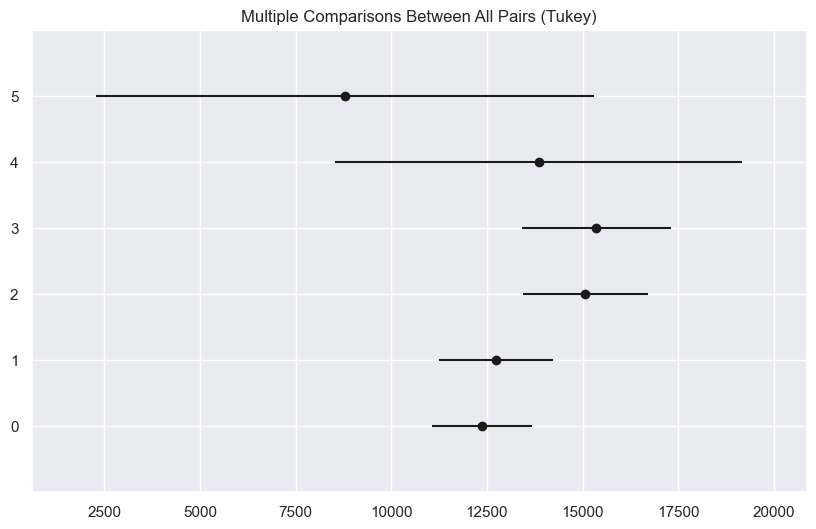

In [326]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

x = pairwise_tukeyhsd(endog = df['charges'], groups = df['children'], alpha = 0.05)

x.plot_simultaneous()

x.summary()

雖然我們用ANOVA的f_oneway()針對不同小孩數量測量出來的P值低於基本顯著水準，但如果透過pairwise_tukeyhsd()去辨別究竟是哪個組和造成的差異，會發現只有在0跟2間有顯著差異(4%)， \
也就是說擁有0個小孩跟擁有2個小孩在健保費用支出上有明顯的不同，其餘的組合都無法推翻虛無假說，其次第二低的組合為擁有0個小孩跟擁有3個小孩，為0.66%。

### 健保支出模型建立

#### 預處理

In [327]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [328]:
encoded_df = df.copy()
encoder = LabelEncoder()

sex = encoder.fit_transform(df['sex'])
smoker = encoder.fit_transform(df['smoker'])
region = encoder.fit_transform(df['region'])

encoded_df['sex_encoded'] = sex
encoded_df['smoker_encoded'] = smoker
encoded_df['region_encoded'] = region

encoded_df.drop(columns = ['sex', 'smoker', 'region'], inplace = True)
encoded_df = encoded_df[['age', 'bmi', 'children', 'sex_encoded', 'smoker_encoded', 'region_encoded', 'charges']]

encoded_df

,age,bmi,children,sex_encoded,smoker_encoded,region_encoded,charges
0,19,27.900,0,0,1,3,16884.92400
1,18,33.770,1,1,0,2,1725.55230
2,28,33.000,3,1,0,2,4449.46200
3,33,22.705,0,1,0,1,21984.47061
4,32,28.880,0,1,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,10600.54830
1334,18,31.920,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,2,1629.83350
1336,21,25.800,0,0,0,3,2007.94500


In [ ]:
for label in encoded_df.columns[:-1]:
    plt.scatter(x = encoded_df[label], y = df['charges'])
    plt.title(label)
    plt.tight_layout()
    plt.show()

In [330]:
encoded_df.corr()

,age,bmi,children,sex_encoded,smoker_encoded,region_encoded,charges
age,1.000000,0.109272,0.042469,-0.020856,-0.025019,0.002127,0.299008
bmi,0.109272,1.000000,0.012759,0.046371,0.003750,0.157566,0.198341
children,0.042469,0.012759,1.000000,0.017163,0.007673,0.016569,0.067998
sex_encoded,-0.020856,0.046371,0.017163,1.000000,0.076185,0.004588,0.057292
smoker_encoded,-0.025019,0.003750,0.007673,0.076185,1.000000,-0.002181,0.787251
region_encoded,0.002127,0.157566,0.016569,0.004588,-0.002181,1.000000,-0.006208
charges,0.299008,0.198341,0.067998,0.057292,0.787251,-0.006208,1.000000


In [331]:
# Drop features with a correlation close to 0

encoded_df.drop(columns = ['region_encoded'], inplace = True)

In [332]:
train, test = train_test_split(encoded_df, test_size = 0.4, random_state=15)

X_train, y_train = train[train.columns[:-1]].values, train[train.columns[-1]].values
X_test, y_test = test[test.columns[:-1]].values, test[test.columns[-1]].values

### Linear Regression

In [333]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X = X_train, y = y_train)

print('lr_model\'s intercept: ', lr_model.intercept_)
print('lr_model\'s coefficent: ', lr_model.coef_)
print('lr_model\'s score(R-squared): ', lr_model.score(X = X_train, y = y_train))

lr_model's intercept:  -12588.993389131918
lr_model's coefficent:  [  262.72686366   334.92840584   607.68981861  -144.85822715
 23691.87106531]
lr_model's score(R-squared):  0.7354985324447202


In [334]:
from sklearn.metrics import mean_squared_error

pred = lr_model.predict(X_test)

RMSE = mean_squared_error(pred, y_test)**0.5
print('Linear Regression\'s RMSE: ', RMSE)

Linear Regression's RMSE:  5913.064696698831


### Regression with Neural Net

In [335]:
import tensorflow as tf

In [336]:
normalizer = tf.keras.layers.Normalization(input_shape=(5,), axis=None)
normalizer.adapt(X_train)

In [337]:
r_nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1)
])

r_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [338]:
r_nn_model.fit(
    X_train, y_train,
    verbose=0,
    epochs=1000,
    validation_split = 0.2
)


r_nn_pred = r_nn_model.predict(X_test)

RMSE = mean_squared_error(r_nn_pred, y_test)**0.5
print('Regression with Neural Net\'s RMSE: ', RMSE)

17/17 [==============================] - 0s 498us/step
Regression with Neural Net's RMSE:  17160.94698821942


### Neural Networks

In [339]:
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [340]:
nn_model.fit(
    X_train, y_train,
    verbose=0,
    epochs=1000,
    validation_split = 0.2
)


nn_pred = nn_model.predict(X_test)

RMSE = mean_squared_error(nn_pred, y_test)**0.5
print('Neural Networks\'s RMSE: ', RMSE)

17/17 [==============================] - 0s 513us/step
Neural Networks's RMSE:  6883.215934295252


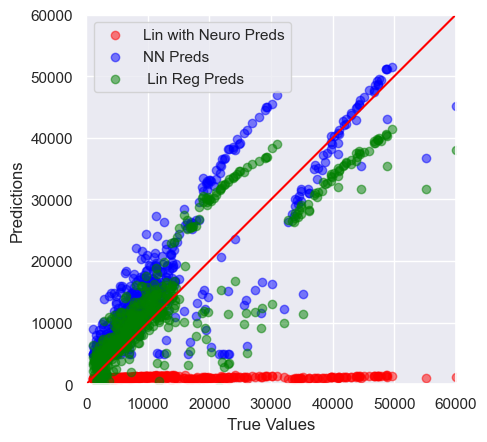

In [341]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, r_nn_pred, label="Lin with Neuro Preds", color = 'red', alpha = 0.5)
plt.scatter(y_test, nn_pred, label="NN Preds", color = 'blue', alpha = 0.5)
plt.scatter(y_test, pred, label=" Lin Reg Preds", color = 'green', alpha = 0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 60000]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, color ="red")

我們試了三種模型，分別為：
1. linear regression
2. linear regression with neuro
3. Neural networks

三種模型的根均方誤差(RMSE)分別為：
1. 5913.064696698831
2. 17160.94698821942
3. 6883.215934295252

就以上結果，模型準度依序為：linear regression > Neural networks(可再利用loop調整多種參數) > linear regression with neuro